<a href="https://colab.research.google.com/github/MatiasMingo/Machine-Learning-Projects/blob/main/q_earnings_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('earnings_data.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,ToV
1,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,ToV
2,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,ToV
3,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,ToV
4,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...,ToV


1.

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=ecbbd45b777964d7a06dabc10056cbef4fd8b2f68b258aa66ddb4cf2ae1bd66f
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
Emoción imagen Nº1: enojo
Emoción imagen Nº2: asco
Emoción imagen Nº3: miedo
Emoción imagen Nº4: alegría
Emoción imagen Nº5: tristeza
Emoción imagen Nº6: sorpresa
Emoción imagen Nº7: neutral


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


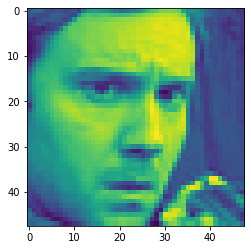

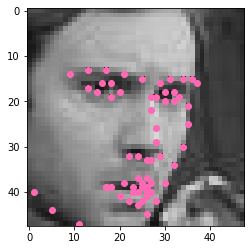

<Figure size 432x288 with 0 Axes>

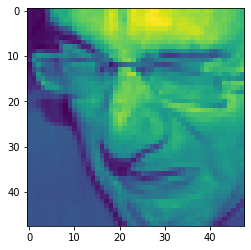

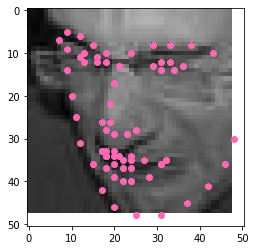

<Figure size 432x288 with 0 Axes>

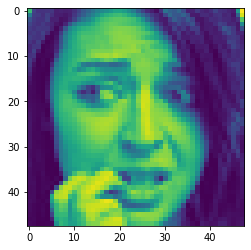

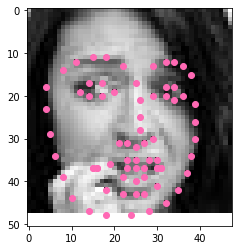

<Figure size 432x288 with 0 Axes>

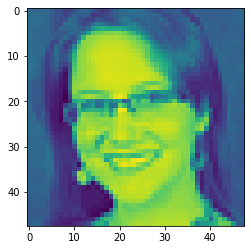

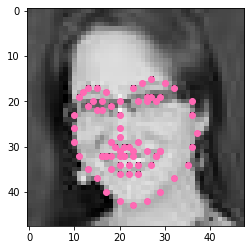

<Figure size 432x288 with 0 Axes>

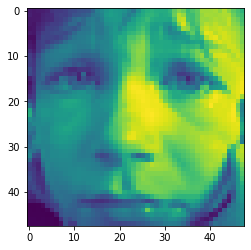

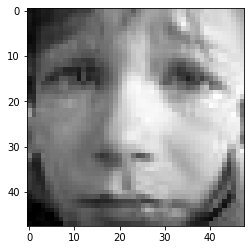

<Figure size 432x288 with 0 Axes>

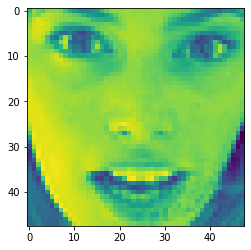

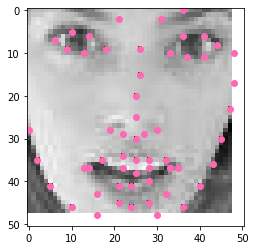

<Figure size 432x288 with 0 Axes>

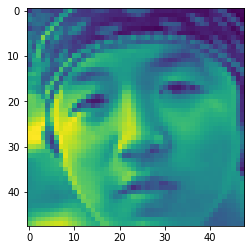

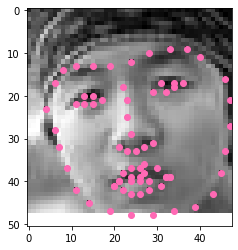

<Figure size 432x288 with 0 Axes>

In [ ]:
!pip3 install face_recognition
!pip install Pillow
from PIL import Image, ImageDraw
import pandas as pd
df = pd.read_csv('mini_fer2013.csv')
clean_df = df.dropna(axis=0)
import face_recognition as fr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
list_emotions = ["enojo", "asco", "miedo", "alegría", "tristeza", "sorpresa", "neutral"]

def get_image(num_emotion):
  index_row_df = 0
  im = Image.new("L",(48,48))
  for elem in clean_df["emotion"]:
    if elem == num_emotion:
      """Imagenes de 48x48 """
      pixels = clean_df["pixels"][index_row_df].split(" ")
      list_pixels = list()
      print("Emoción imagen Nº{}: {}".format(i+1,list_emotions[num_emotion]))
      for pix in pixels:
        if pix != " ":
          list_pixels.append(int(pix))
      im.putdata(list_pixels)
      plt.figure()
      plt.imshow(im)
      im.save("{}.jpg".format(list_emotions[num_emotion]))
      return
    index_row_df += 1

def plot_landmarks_pic(num_emotion):
  path_img = "{}.jpg".format(list_emotions[num_emotion])
  image = fr.load_image_file(path_img)
  face_landmarks_list = fr.face_landmarks(image)
  pil_image = Image.fromarray(image)
  draw = ImageDraw.Draw(pil_image)
  list_points = list()
  try:
    for key, value in face_landmarks_list[0].items():
      for x,y in value:
        if x < 0 or y < 0 or x > 48 or y > 48:
          continue
        else:
          list_points.append((x,y))
    draw.point(list_points, fill=0)
    plt.figure()
    plt.imshow(pil_image)
  except:
    plt.figure()
    plt.imshow(pil_image)

def plot_landmarks_points(num_emotion):
  path_img = "{}.jpg".format(list_emotions[num_emotion])
  image = fr.load_image_file(path_img)
  face_landmarks_list = fr.face_landmarks(image)
  list_points = list()
  try:
    for key, value in face_landmarks_list[0].items():
      for x,y in value:
        if x < 0 or y < 0 or x > 48 or y > 48:
          continue
        else:
          list_points.append((x,y))
    x_scatter = list()
    y_scatter = list()
    for x,y in list_points:
      x_scatter.append(x)
      y_scatter.append(y)
    plt.scatter(np.array(x_scatter),np.array(y_scatter), color = 'hotpink')
    plt.figure()
  except:
    plt.figure()

for i in range(0,7):
  get_image(i)
  plot_landmarks_pic(i)
  plot_landmarks_points(i)


En primer lugar se realizo una limpieza de los datos eliminando los nulos.

Justificación al hacer el plotting de landmarks:
Para los casos en que x o y eran negativos o mayores que 48 estas coordenadas se ignoraban ya que no estaban dentro de los márgenes de una imagen de 48x48 pixeles.
Por otro lado, cuando la función face_landmarks retornaba una lista vacía no se dibujaban landmarks en la cara ya que dlib no reconocía landmarks.

2.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
df = pd.read_csv('mini_fer2013.csv')
clean_df = df.dropna(axis=0)
clean_df.isna().sum()
count_duplicants = 0
count_non_duplicated = 0
duplicant_indexes = list()
for vals in clean_df.duplicated():
  if str(vals) == "True":
    count_duplicants +=1
  else:
    count_non_duplicated +=1
percentage_duplicated = 100*(count_duplicants/(count_duplicants+count_non_duplicated))

""" Si hacemos print(str(percentage_duplicated)+"%") obtenemos un 4.14% de duplicados aproximadamente.
4.14% no es un porcentaje muy alto de duplicados por lo tanto se dejan. También se dejan ya que pueden haber imagenes mal etiquetadas."""
"""Probaré la siguiente proporción del número de datos para los dataframes Training-Validation: 70%-20% aproximados respectivamente con respecto a el
dataframe completo incluyendo el testing que es 10% aproximadamente.
Los datos serán obtenidos aleatoriamente del dataframe preprocesado (clean_df).
"""
number_of_rows_df = len(df.index)
rows_testing = df.loc[df['Usage'] == "Test"]
print("Testing dataframe: \n")
print(rows_testing)
tov_clean_df = clean_df[~clean_df.isin(rows_testing)]
tov_clean_df = tov_clean_df.dropna(axis=0)
rows_training = tov_clean_df.sample(frac=0.78, replace=False, axis=0)
rows_training = rows_training.dropna(axis=0)
print("Training dataframe: \n")
print(rows_training)
rows_validation = tov_clean_df[~tov_clean_df.isin(rows_training)]
rows_validation = rows_validation.dropna(axis=0)
print("Validation dataframe: \n")
print(rows_validation)


rows_testing.to_csv("testing.csv")
rows_training.to_csv("training.csv")
rows_validation.to_csv("validation.csv")
"""Aquí se obtienen la cantidad de veces que clases ocurren para un cierto dataframe en este caso
el de validation
print("\n validation")
print(rows_validation.loc[rows_validation['emotion'] == 0].shape[0])
print(rows_validation.loc[rows_validation['emotion'] == 1].shape[0])
print(rows_validation.loc[rows_validation['emotion'] == 2].shape[0])
print(rows_validation.loc[rows_validation['emotion'] == 3].shape[0])
print(rows_validation.loc[rows_validation['emotion'] == 4].shape[0])
print(rows_validation.loc[rows_validation['emotion'] == 5].shape[0])
print(rows_validation.loc[rows_validation['emotion'] == 6].shape[0])
print("\n testing")
print(rows_testing.loc[rows_testing['emotion'] == 0].shape[0])
print(rows_testing.loc[rows_testing['emotion'] == 1].shape[0])
print(rows_testing.loc[rows_testing['emotion'] == 2].shape[0])
print(rows_testing.loc[rows_testing['emotion'] == 3].shape[0])
print(rows_testing.loc[rows_testing['emotion'] == 4].shape[0])
print(rows_testing.loc[rows_testing['emotion'] == 5].shape[0])
print(rows_testing.loc[rows_testing['emotion'] == 6].shape[0])
print("\n training")
print(rows_training.loc[rows_training['emotion'] == 0].shape[0])
print(rows_training.loc[rows_training['emotion'] == 1].shape[0])
print(rows_training.loc[rows_training['emotion'] == 2].shape[0])
print(rows_training.loc[rows_training['emotion'] == 3].shape[0])
print(rows_training.loc[rows_training['emotion'] == 4].shape[0])
print(rows_training.loc[rows_training['emotion'] == 5].shape[0])
print(rows_training.loc[rows_training['emotion'] == 6].shape[0])
"""
print("\n Matrices X  y vectores y \n")
print("Para training: \n")
X_training = rows_training[["pixels"]].to_numpy()
training_x = []
for vert_t in X_training:
  string_pixels = vert_t[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  training_x.append(list(map_object))
X_training = np.array(training_x)
y_training = rows_training[["emotion"]].to_numpy()
print("X:{} \n  y:{}".format(X_training, y_training))

print("Para validation: \n")
X_validation = rows_validation[["pixels"]].to_numpy()
validation_x = []
for vert_v in X_validation:
  string_pixels = vert_v[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  validation_x.append(list(map_object))
X_validation = np.array(validation_x)
y_validation = rows_validation[["emotion"]].to_numpy()
print("X:{} \n  y:{}".format(X_validation, y_validation))

print("Para testing: \n")
X_testing = rows_testing[["pixels"]].to_numpy()
testing_x = []
for vert_test in X_testing:
  string_pixels = vert_test[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  testing_x.append(list(map_object))
X_testing = np.array(testing_x)
y_testing = rows_testing[["emotion"]].to_numpy()
print("X:{} \n  y:{}".format(X_testing, y_testing))


Testing dataframe: 

       emotion                                             pixels Usage
15455        0  170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...  Test
15456        4  72 66 66 69 62 51 57 60 56 66 63 70 68 68 81 9...  Test
15457        3  4 4 7 12 14 18 26 31 33 38 44 49 59 68 80 86 9...  Test
15458        0  245 245 239 122 144 101 33 37 84 137 143 130 1...  Test
15459        3  20 31 65 81 79 63 61 51 61 97 114 121 140 200 ...  Test
...        ...                                                ...   ...
17155        3  217 220 222 223 223 224 225 223 223 225 223 22...  Test
17156        5  248 251 239 144 102 95 82 77 91 138 153 145 14...  Test
17157        2  164 172 175 171 172 173 178 181 188 192 197 20...  Test
17158        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  Test
17159        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  Test

[1705 rows x 3 columns]
Training dataframe: 

       emotion                                             pixels Us

Número de muestras para cada set:


*   Testing: 1705 muestras
*   Training: 12055 muestras
*   Validation: 3400 muestras

Ejemplos por cada clase en cada set:


1.   Testing:
*   Enojo: 184
*   Asco: 11
*   Miedo: 132
*   Alegría: 624
*   Tristeza: 126
*   Sorpresa: 215
*   Neutral: 413


2.   Training:

*   Enojo: 1400
*   Asco: 77
*   Miedo: 817
*   Alegría: 4450
*   Tristeza: 1021
*   Sorpresa: 1493
*   Neutral: 2797

3.   Validation:
*   Enojo: 422
*   Asco: 29
*   Miedo: 216
*   Alegría: 1248
*   Tristeza: 314
*   Sorpresa: 395
*   Neutral: 776


¿Cuanto es el máximo de carácteristicas que puede incluir en cada matriz X?
Según lo visto en clases con respecto a rule of thumb para la separación del set de datos el cual es:


*   60-80% para training
*   10-20% para testing
*   10-20% validation

Obtenemos los siguientes máximos de caracteristicas que pueden incluir cada matriz X (independientes entre ellas):

1.   Testing: 3432
2.   Training: 13728
3.   Validation: 3432







3.

Estudio de 5 iteraciones de valores de kernel y slack para SVM:

Para kernel="linear" y slack = 0.1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

"""SVM"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

list_kernels = ["linear","rbf", "sigmoid"]
list_slacks = [0.1,3,5,7,10]
#slack = abs(t-clf.decision_function([x]))
clf = make_pipeline(StandardScaler(), SVC().set_params(C=list_slacks[0],kernel=list_kernels[0]))
clf.fit(X, y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Exactitud:0.46294117647058824
Confusion matrix:



array([[118,   9,  30, 137,  25,  24,  79],
       [  4,   2,   2,   7,   4,   4,   6],
       [ 36,   4,  41,  57,  20,  20,  38],
       [116,  15,  54, 828,  53,  40, 142],
       [ 57,   6,  19,  90,  50,  13,  79],
       [ 38,   2,  33,  42,  20, 215,  45],
       [ 90,   9,  59, 207,  50,  41, 320]])

Para kernel="rbf" y slack = 7

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

"""SVM"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

list_kernels = ["linear","rbf", "sigmoid"]
list_slacks = [1,7,5,0.3,0.6]
#slack = abs(t-clf.decision_function([x]))
clf = make_pipeline(StandardScaler(), SVC().set_params(C=list_slacks[1],kernel=list_kernels[1]))
clf.fit(X, y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Exactitud:0.5935294117647059
Confusion matrix:



array([[ 155,    0,   20,  120,   28,   18,   81],
       [   4,    3,    5,    8,    1,    2,    6],
       [  24,    0,   55,   54,   17,   22,   44],
       [  49,    0,    8, 1029,   25,   20,  117],
       [  48,    0,   18,   94,   55,    7,   92],
       [  22,    0,   12,   42,    2,  269,   48],
       [  52,    0,   22,  183,   42,   25,  452]])

Para kernel="sigmoid" y slack = 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

"""SVM"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

list_kernels = ["linear","rbf", "sigmoid"]
list_slacks = [1,3,5,7,10]
#slack = abs(t-clf.decision_function([x]))
clf = make_pipeline(StandardScaler(), SVC().set_params(C=list_slacks[2],kernel=list_kernels[2]))
clf.fit(X, y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Exactitud:0.3447058823529412
Confusion matrix:



array([[133,   0,   1, 109,  76,  15,  88],
       [  4,   0,   0,  10,   1,   5,   9],
       [ 48,   0,   5,  66,  37,  13,  47],
       [228,   2,   4, 646, 176,  15, 177],
       [ 82,   0,   3,  95,  62,   5,  67],
       [ 95,   1,   5,  71,  46,  93,  84],
       [169,   0,   8, 194, 153,  19, 233]])

Para kernel="linear" y slack = 0.3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

"""SVM"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

list_kernels = ["linear","rbf", "sigmoid"]
list_slacks = [1,3,5,0.3,0.6]
#slack = abs(t-clf.decision_function([x]))
clf = make_pipeline(StandardScaler(), SVC().set_params(C=list_slacks[3],kernel=list_kernels[0]))
clf.fit(X, y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Exactitud:0.44794117647058823
Confusion matrix:



array([[119,   8,  38, 128,  32,  27,  70],
       [  5,   2,   6,   4,   5,   4,   3],
       [ 39,   4,  46,  56,  14,  14,  43],
       [134,  17,  65, 792,  54,  42, 144],
       [ 71,   6,  29,  79,  48,  17,  64],
       [ 39,   2,  38,  45,  16, 216,  39],
       [ 99,   9,  72, 195,  54,  47, 300]])

Para kernel="rbf" y slack = 0.6

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

"""SVM"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

list_kernels = ["linear","rbf", "sigmoid"]
list_slacks = [1,3,5,0.3,0.6]
#slack = abs(t-clf.decision_function([x]))
clf = make_pipeline(StandardScaler(), SVC().set_params(C=list_slacks[4],kernel=list_kernels[1]))
clf.fit(X, y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Exactitud:0.5620588235294117
Confusion matrix:



array([[  81,    0,    0,  206,    0,   24,  111],
       [   3,    0,    0,   14,    0,    3,    9],
       [  10,    0,    8,  111,    1,   17,   69],
       [   7,    0,    0, 1115,    2,   20,  104],
       [  15,    0,    0,  153,   10,   10,  126],
       [   7,    0,    0,   87,    0,  231,   70],
       [  12,    0,    0,  280,    1,   17,  466]])

Estudio de arbol de decisión para dos valores de criterion y 7 valores de max_depth

criterion = "gini" y max_depth = 7

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

list_criterions = ["gini", "entropy"]
list_depths = [7,10,3,4,5,20,40]

"""Arbol de decisión"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

clf = DecisionTreeClassifier().set_params(criterion=list_criterions[0],max_depth=list_depths[0])
clf = clf.fit(X,y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

Exactitud:0.4326470588235294
Confusion matrix:



array([[ 34,   0,   6, 209,  19,  30, 124],
       [  1,   0,   1,  13,   1,   2,  11],
       [ 15,   0,   5,  80,   3,  27,  86],
       [ 35,   0,  11, 879,  17,  52, 254],
       [ 25,   0,   5, 140,  12,  21, 111],
       [ 15,   0,   6, 110,   3, 148, 113],
       [ 19,   0,   1, 283,  21,  59, 393]])

criterion = "gini" max_depth = 10

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

list_criterions = ["gini", "entropy"]
list_depths = [7,10,3,4,5,20,40]

"""Arbol de decisión"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

clf = DecisionTreeClassifier().set_params(criterion=list_criterions[0],max_depth=list_depths[1])

clf = clf.fit(X,y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

Exactitud:0.43176470588235294
Confusion matrix:



array([[ 66,   2,  16, 164,  22,  28, 124],
       [  2,   0,   0,  10,   2,   3,  12],
       [ 23,   0,  19,  69,  10,  19,  76],
       [ 84,   1,  36, 797,  55,  36, 239],
       [ 34,   0,  12, 104,  26,  18, 120],
       [ 25,   1,  11,  86,  14, 150, 108],
       [ 44,   0,  24, 232,  29,  37, 410]])

criterion = "gini" max_depth = 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

list_criterions = ["gini", "entropy"]
list_depths = [7,10,3,4,5,20,40]

"""Arbol de decisión"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

clf = DecisionTreeClassifier().set_params(criterion=list_criterions[0],max_depth=list_depths[2])

clf = clf.fit(X,y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

Exactitud:0.4
Confusion matrix:



array([[  0,   0,   0, 259,   0,  24, 139],
       [  0,   0,   0,  15,   0,   1,  13],
       [  0,   0,   0, 121,   0,  13,  82],
       [  0,   0,   0, 910,   0,  18, 320],
       [  0,   0,   0, 184,   0,  14, 116],
       [  0,   0,   0, 136,   0, 112, 147],
       [  0,   0,   0, 404,   0,  34, 338]])

criterion = "entropy" max_depth = 20

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

list_criterions = ["gini", "entropy"]
list_depths = [7,10,3,20,50,70,80]

"""Arbol de decisión"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

clf = DecisionTreeClassifier().set_params(criterion=list_criterions[1],max_depth=list_depths[3])

clf = clf.fit(X,y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

Exactitud:0.3947058823529412
Confusion matrix:



array([[ 96,   2,  32, 106,  43,  40, 103],
       [  7,   2,   4,   7,   1,   4,   4],
       [ 29,   3,  41,  53,  25,  18,  47],
       [118,  13,  67, 669,  81,  64, 236],
       [ 45,   3,  23,  88,  47,  27,  81],
       [ 36,   2,  21,  49,  27, 208,  52],
       [ 91,   8,  52, 216,  67,  63, 279]])

criterion= "entropy" max_depth= 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

list_criterions = ["gini", "entropy"]
list_depths = [7,10,3,4,5,20,40]

"""Arbol de decisión"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

clf = DecisionTreeClassifier().set_params(criterion=list_criterions[1],max_depth=list_depths[4])

clf = clf.fit(X,y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

Exactitud:0.4202941176470588
Confusion matrix:



array([[  5,   0,   0, 206,   6,  41, 164],
       [  0,   0,   0,  13,   0,   1,  15],
       [  0,   0,   0,  88,   0,  31,  97],
       [  8,   0,   0, 848,   4,  54, 334],
       [  3,   0,   0, 129,   4,  25, 153],
       [  1,   0,   0,  72,   2, 155, 165],
       [  4,   0,   0, 313,   3,  39, 417]])

criterion = "gini" y max_depth = 40

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

list_criterions = ["gini", "entropy"]
list_depths = [7,10,3,4,5,20,40]

"""Arbol de decisión"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

clf = DecisionTreeClassifier().set_params(criterion=list_criterions[0],max_depth=list_depths[6])

clf = clf.fit(X,y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

Exactitud:0.39235294117647057
Confusion matrix:



array([[ 93,   2,  30, 130,  43,  40,  84],
       [  2,   3,   5,   6,   3,   3,   7],
       [ 26,   0,  43,  55,  20,  24,  48],
       [144,  11,  69, 618,  96,  83, 227],
       [ 37,   4,  24,  83,  54,  30,  82],
       [ 24,   1,  31,  60,  21, 206,  52],
       [ 65,   8,  55, 198,  73,  60, 317]])

criterio = "entropy" y max_depth = 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

list_criterions = ["gini", "entropy"]
list_depths = [7,10,3,4,5,20,40]

"""Arbol de decisión"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

clf = DecisionTreeClassifier().set_params(criterion=list_criterions[1],max_depth=list_depths[2])

clf = clf.fit(X,y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

Exactitud:0.4052941176470588
Confusion matrix:



array([[   0,    0,    0,  300,    0,   26,   96],
       [   0,    0,    0,   19,    0,    2,    8],
       [   0,    0,    0,  142,    0,   18,   56],
       [   0,    0,    0, 1059,    0,   34,  155],
       [   0,    0,    0,  221,    0,   14,   79],
       [   0,    0,    0,  188,    0,  120,   87],
       [   0,    0,    0,  548,    0,   29,  199]])

Estudio del clasificador bayesiano ingenuo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')


"""Arbol de decisión"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

clf = GaussianNB()
clf = clf.fit(X,y)
X_val = df_validation[["pixels"]].to_numpy()
new_x_val = []
for vert in X_val:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_val.append(list(map_object))
X_val = np.array(new_x_val)
y_val = df_validation[["emotion"]].to_numpy()
y_prediction = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_val, y_prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Exactitud:0.21382352941176472
Confusion matrix:



array([[ 33,  57,  24,  31, 128, 110,  39],
       [  3,   6,   3,   1,   2,  10,   4],
       [ 11,  40,  18,   9,  44,  71,  23],
       [ 61, 203,  57, 197, 245, 311, 174],
       [ 28,  38,  19,  25,  98,  68,  38],
       [ 15,  27,  18,  21,  28, 239,  47],
       [ 32, 102,  34,  61, 231, 180, 136]])

Conclusiones y respuestas a preguntas:

¿Qué clasificador tiene mejor resultado con este problema?:

El clasificador con mejores resultados fue SVM con parametros kernel="rbf" y slack = 7, con una exactitud del 59.35294% aproximadamente.

¿Cual es la posible razón?:
Una de las razones principales es que las clases son faciles de separar linealmente. Esto se puede deber a que las distintas emociones generan valores de pixeles en posiciones (x,y) que se diferencian bastante entre ellas y, por lo tanto, estas clases pueden ser separadas linealmente con mas facilidad.

Otra razón se debe la naturaleza misma del clasificador SVM, en donde este maximiza el margen de clasificación. O sea, clasifica de tal manera que los valores de los pixeles de cada clase que estan mas cercanos entre ellos los toma como puntos de frontera para así construir un plano g(Xk) que separa linealmente las clases con fronteras de minimo margen.

Por ultimo esta tabién la posibilidad de que no ocurrió overfitting.


¿Por qué le podría ir mal al peor de los clasificadores?:
El peor de los clasificadores fue el clasificador bayesiano ingenuo.
Existen dos razones principales de por que le pudo haber ido mal. Por un lado esta la posibilidad de overfitting y, por otro lado, la base de datos pudo no haber tenido la cantidad de datos suficientes, ya que en general un clasificador bayesiano ingenuo tiene mejores resultados con datasets con muchos datos.


4.
La matriz de confusión del mejor clasificador con los mejores hiperparametros fue el del clasificador SVM con hyperparametros kernel="rbf" y slack = 7:


```
array([[ 155,    0,   20,  120,   28,   18,   81],
       [   4,    3,    5,    8,    1,    2,    6],
       [  24,    0,   55,   54,   17,   22,   44],
       [  49,    0,    8, 1029,   25,   20,  117],
       [  48,    0,   18,   94,   55,    7,   92],
       [  22,    0,   12,   42,    2,  269,   48],
       [  52,    0,   22,  183,   42,   25,  452]])
```

El error más común fue la predicción de una emoción neutral cuando realmente era alegría. Luego de ver las imagenes, este error se puede explicar debido a los leves cambios faciales que diferencian a estas dos emociones y por lo tanto en los valores de los pixeles y sus posiciones en el plano cartesiano. De esta manera no le fue facil a este clasificador poder separar linealmente estas dos clases.

La categoría que obtiene el mejor rendimiento es alegría. Esto se puede deber a que es la clase con mas muestras entre las 7 clases.

La categoría con mas bajo rendimiento fue asco. Esto se puede deber a la poca cantidad de muestras que tiene esta clase siendo la mas baja entre las 7 clases.

5.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

df_training = pd.read_csv('training.csv')
df_validation = pd.read_csv('validation.csv')
df_testing = pd.read_csv('testing.csv')

"""SVM"""
X = df_training[["pixels"]].to_numpy()
new_x = []
for vert in X:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x.append(list(map_object))
X = np.array(new_x)
y = df_training[["emotion"]].to_numpy()

list_kernels = ["linear","rbf", "sigmoid"]
list_slacks = [1,7,5,0.3,0.6]
clf = make_pipeline(StandardScaler(), SVC(C=list_slacks[1],kernel=list_kernels[1]))
clf.fit(X, y)
X_test = df_testing[["pixels"]].to_numpy()
new_x_test = []
for vert in X_test:
  string_pixels = vert[0]
  list_pixls = string_pixels.split(" ")
  map_object = map(int, list_pixls)
  new_x_test.append(list(map_object))
X_test = np.array(new_x_test)
y_test = df_testing[["emotion"]].to_numpy()
y_prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print("Exactitud:{}".format(accuracy))
print("Confusion matrix:\n")
confusion_matrix(y_test, y_prediction)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Exactitud:0.6258064516129033
Confusion matrix:



array([[ 68,   0,  16,  49,  12,   2,  37],
       [  1,   3,   1,   2,   2,   0,   2],
       [ 15,   0,  32,  31,  12,  16,  26],
       [ 28,   0,   4, 508,  18,   8,  58],
       [ 21,   0,   7,  33,  26,   5,  34],
       [  8,   0,   7,  18,   3, 156,  23],
       [ 28,   0,   4,  84,  17,   6, 274]])

Análisis:
Se seleccionó el clasificador SVM con hyperparametros kernel="rbf" y slack=7 ya que tuvo el mejor rendimiento con un 59.35294% aproximado de exactitud.

Se puede apreciar que al predecir con el la matriz X del set de test mediante este clasificador entrenado, obtenemos una mayor exactitud con aproximadamente un 3.23% de mejora.

Matriz de confusión de la parte 4:
```
array([[ 155,    0,   20,  120,   28,   18,   81],
       [   4,    3,    5,    8,    1,    2,    6],
       [  24,    0,   55,   54,   17,   22,   44],
       [  49,    0,    8, 1029,   25,   20,  117],
       [  48,    0,   18,   94,   55,    7,   92],
       [  22,    0,   12,   42,    2,  269,   48],
       [  52,    0,   22,  183,   42,   25,  452]])
```
Matriz de confusión generado con el set de test:
```
array([[ 68,   0,  16,  49,  12,   2,  37],
       [  1,   3,   1,   2,   2,   0,   2],
       [ 15,   0,  32,  31,  12,  16,  26],
       [ 28,   0,   4, 508,  18,   8,  58],
       [ 21,   0,   7,  33,  26,   5,  34],
       [  8,   0,   7,  18,   3, 156,  23],
       [ 28,   0,   4,  84,  17,   6, 274]])
```
En general se puede apreciar que la diagonal de la matriz de confusión obtenida con el set de test tiene mejores valores con respecto a los valores en proporción a los de confusion en la matriz de confusión de la parte 4. Esto se concluye por el 3.23% de mejora en exactitud de predicción.

Al igual que en la parte 4, el error más común fue la predicción de una emoción neutral cuando realmente era alegría. La explicación de por que se pudo haber dado esto se encuentra en la parte 4.

Al igual que en la parte 4, la categoría que obtiene el mejor rendimiento es alegría. Esto se puede deber a que es la clase con mas muestras entre las 7 clases.

La categoría con mas bajo rendimiento fue asco. Esto se puede deber a la poca cantidad de muestras que tiene esta clase siendo la mas baja entre las 7 clases.



6.

En primer lugar partiré con las definiciones y comparaciones de las tecnincas de Boosting y Bagging:

La técnica Boosting busca crear modelos que se vuelven expertos en los datos que no pudieron ser explicados por los modelos anteriores (Ensamble de Clasificadores, E Morales, H Jair). Para lograr esto, esta tecnica ensambla calsificadores de manera sequencial y va cambiando las muestras y ejemplos con pesos respectivos que dependen de que tan mal fueron clasificados. La idea del boosting es forzar a los nuevos clasificadores generados a minimizar el error esperado al asignar mas peso a los ejemplos mal clasificados y menos a los bien clasificados(Ensamble de Clasificadores, E Morales, H Jair).  El clasificador final se forma usando un esquema de votacion pesado que depende  del desempeño de cada clasificador en su conjunto de entrenamiento (Ensamble de Clasificadores, E Morales, H Jair).

La técnica Bagging comienza separando el training set en varios sub-training sets. Luego se utilizan diferentes clasificadores para modelar estos training sets mas pequeños de manera paralela. Cada clasificador es único con respecto a su forma de modelar para su respectivo training set. Al final se construye un clasificador dependiendo de la clase que se retorna mayoritariamente entre los clasificadores anteriores(Ensamble de Clasificadores, E Morales, H Jair).Al combinar varios clasificadores se reduce el error esperado al reducir la varianza. Esta técnica funciona bien para clasificadores como los arboles de decisiones.

Al comparar ambas técnicas podemos apreciar que las dos generan clasificadores pero de manera distinta. Por un lado Boosting los genera secuencialmente y por el otro Bagging los genera paralelamente. Una diferencia esencial entre estas dos técnicas es en la forma en que se decide el  clasificador optimo final. Por un lado, Boosting ocupa pesos para tomar esta decision y, por el otro lado, Bagging utiliza un voto mayoritario para tomar esta decision sobre el clasificador.

Luego de tomar en cuenta mis conocimientos aprendidos en clases, mi experiencia con el set de datos entregado y las referencias encontradas en el interent, propongo una arquitectura de ensamble de SVM con kernerl "rbf", ya que estos fueron los unicos con errores menores al 50%, y se propone la metodología boosting ya que la técnica Bagging no funciona bien para clasificadores como SVM pero si para arboles de decisión. También elegí la metodología Boosting ya que enfatiza los ejemplos mal clasificados al asignarles pesos lo cual sería de grán ayuda dado este set de datos y este problema de clasificación, ya que se generan muchos errores de clasificación y por lo tanto podría mejorar sustancialmente en su exactitud de predicción el clasificador final generado por el ensamble.

A continuación se muestra un diagrama de bloques de la arquitectura propuesta:
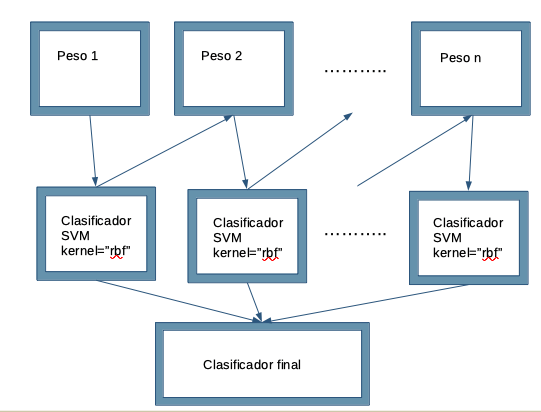

Bibliografía: Ensambles de Clasificadores, Eduardo Morales, Hugo Jair Escalante, INAOE. Obtenido de https://ccc.inaoep.mx/~emorales/Cursos/Aprendizaje2/Acetatos/ensambles.pdf